In [7]:
# Dependencies
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import iqr

In [16]:
# Load heart data set into pandas
heart_df = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
heart_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [18]:
heart_df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [19]:
heart_df["high_blood_pressure"].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [50]:
print(heart_df['high_blood_pressure'].isnull().sum()) 

0


In [51]:
print(heart_df['high_blood_pressure'].head())

0    1
1    0
2    0
3    0
4    0
Name: high_blood_pressure, dtype: int64


In [39]:
high_blood_pressure = heart_df[(heart_df["high_blood_pressure"]==1) & (heart_df["DEATH_EVENT"]==1)]
num_blood_pressure = len(high_blood_pressure)
print(f"The number of high blood Pressure that had a death event: {num_blood_pressure}")

The number of high blood Pressure that had a death event: 39


In [40]:
nor_blood_pressure = heart_df[(heart_df["high_blood_pressure"]== 0) & (heart_df["DEATH_EVENT"]==1)]
num_nor_blood_pressure = len(nor_blood_pressure)
print(f"The number of normal blood Pressure that had a death event: {num_nor_blood_pressure}")

The number of normal blood Pressure that had a death event: 57


In [54]:
#Count total blood pressure and high boold pressure 
blood_pressure_counts = heart_df['high_blood_pressure'].value_counts().rename_axis('High Blood Pressure').reset_index(name='total_blood_pressure')
# print(blood_pressure_counts)

#Count smoke and non-smoke with death events
death_event_counts = heart_df[heart_df["DEATH_EVENT"]==1]["high_blood_pressure"].value_counts().rename_axis('High Blood Pressure').reset_index(name='Death High Blood Pressure')
# blood_pressure_event_counts

   High Blood Pressure  total_blood_pressure
0                    0                   194
1                    1                   105


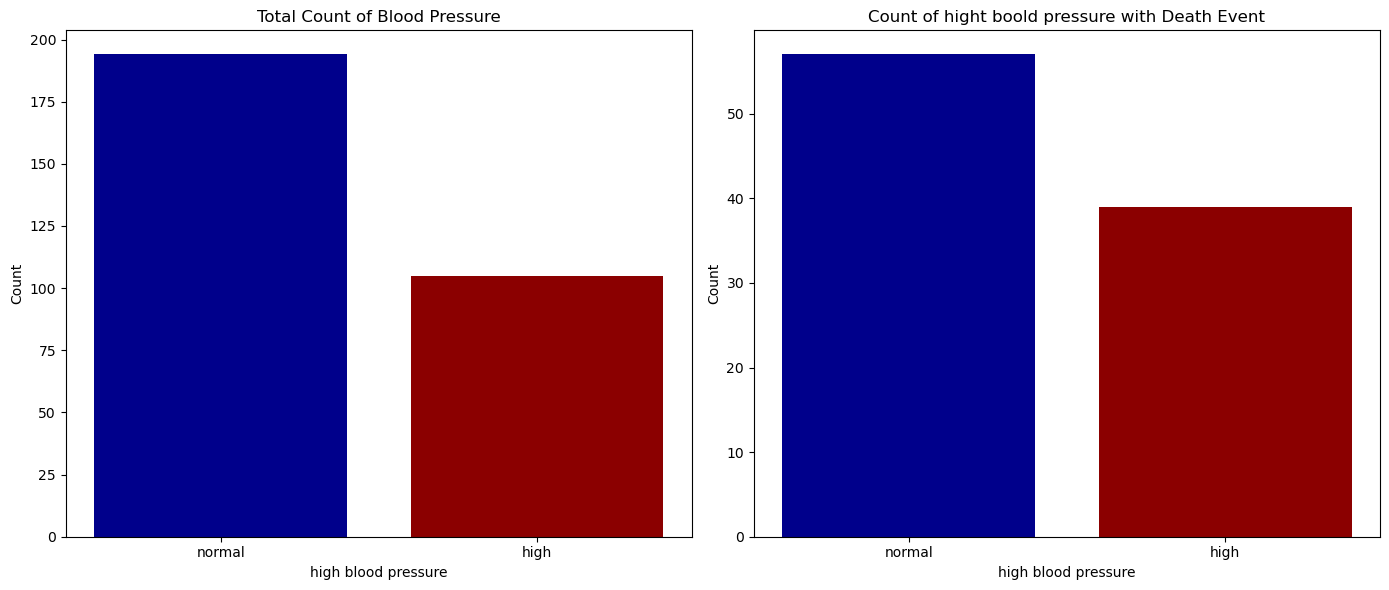

In [59]:
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
# Replace numeric high blood pressure values with labels
blood_pressure_counts['High Blood Pressure'] = blood_pressure_counts['High Blood Pressure'].replace({1: 'high', 0: 'normal'})
death_event_counts['High Blood Pressure'] = death_event_counts['High Blood Pressure'].replace({1: 'high', 0: 'normal'})

# Bar plot for total counts
axes[0].bar(blood_pressure_counts['High Blood Pressure'], blood_pressure_counts['total_blood_pressure'], color=['darkblue', 'darkred'])
axes[0].set_title('Total Count of Blood Pressure')
axes[0].set_xlabel('high blood pressure')
axes[0].set_ylabel('Count')

# Bar plot for death event counts
axes[1].bar(death_event_counts['High Blood Pressure'], death_event_counts['Death High Blood Pressure'], color=['darkblue', 'darkred'])
axes[1].set_title('Count of hight boold pressure with Death Event')
axes[1].set_xlabel('high blood pressure')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [60]:
# Age group
age_bins = [0, 30, 40, 50 , 60, 70, 80, 90, 100]
age_labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70-79','80-89', '90+']
heart_df['age_group'] = pd.cut(heart_df['age'], bins=age_bins, labels=age_labels, right=False)
heart_df.head()

# Smoking patients that encountered a death event by age group
hypertension_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 1)].groupby('age_group', observed=False).size().reset_index(name='hypertension_death_count')
hypertension_death_age_group

# Non Smoking patients that encountered a death event by age group
nor_bloodPerssure_death_age_group = heart_df[(heart_df["high_blood_pressure"] == 1) & (heart_df["DEATH_EVENT"] == 0)].groupby('age_group', observed=False).size().reset_index(name='hypertenson_death_count')
nor_bloodPerssure_death_age_group

#merge smoke and non-smoke age group
death_age_group = hypertension_death_age_group.merge(nor_bloodPerssure_death_age_group, on="age_group", how='outer')
death_age_group

,age_group,hypertension_death_count,hypertenson_death_count
0,0-29,0,0
1,30-39,0,0
2,40-49,5,9
3,50-59,8,18
4,60-69,6,23
5,70-79,13,16
6,80-89,4,0
7,90+,3,0
